Importowanie potrzebnych bibliotek

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
from processing import (load_data, add_num_ingredients_column,extract_ingredient_columns,extract_category_and_glass_columns,combine_dataframes, remove_unnecessary_columns)
from model import preprocess, hierarchical_clustering

Wczytanie pliku "coctail_dataset.json" jako pd.Dataframe

In [109]:
df = load_data("cocktail_dataset.json")
df

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."
...,...,...,...,...,...,...,...,...,...,...,...
129,11985,Quarter Deck Cocktail,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:43.000+00:00,2024-08-18T19:11:43.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
130,11987,Queen Bee,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:44.000+00:00,2024-08-18T19:11:44.000+00:00,"[{'id': 137, 'name': 'Coffee Brandy', 'descrip..."
131,11989,Queen Charlotte,Ordinary Drink,Collins glass,None,Pour red wine and grenadine into a collins gla...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,"[{'id': 250, 'name': 'Grenadine', 'description..."
132,11991,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."


Utworzę nową kolumnę "num_ingredients", która będzie wyświetlała ile poszczególny koktajl zawiera składników.

In [110]:
df = add_num_ingredients_column(df)
df

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients,num_ingredients
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio...",5
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 513, 'name': 'Water', 'description': '...",4
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description...",6
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri...",3
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri...",4
...,...,...,...,...,...,...,...,...,...,...,...,...
129,11985,Quarter Deck Cocktail,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:43.000+00:00,2024-08-18T19:11:43.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description...",3
130,11987,Queen Bee,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:44.000+00:00,2024-08-18T19:11:44.000+00:00,"[{'id': 137, 'name': 'Coffee Brandy', 'descrip...",3
131,11989,Queen Charlotte,Ordinary Drink,Collins glass,None,Pour red wine and grenadine into a collins gla...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,"[{'id': 250, 'name': 'Grenadine', 'description...",3
132,11991,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ...",3


 można zastosować technike one hot encoding i dla każdego składnika stworzyć kolumne z wartością 0 lub 1, 1 gdy występuje w koktajlu i 0 gdy nie występuje. tworzymy osobną ramkę danych dla składników.

In [111]:

ingredients_df = extract_ingredient_columns(df)
ingredients_df

,Sloe Gin,Orange spiral,Celery Salt,Nutmeg,Lemonade,Apple Brandy,Lemon vodka,Raspberry syrup,Port,Wine,...,Egg Yolk,Pineapple Juice,Soda water,Drambuie,Pineapple,Egg White,Cachaca,Green Chartreuse,Green Creme de Menthe,Orange Bitters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Technike one hot encoding zastosuje również dla kolumn glass i category

In [112]:
#stworzenie df dla szklanek
categories_df ,glasses_df = extract_category_and_glass_columns(df)
categories_df


,Highball glass,Old-fashioned glass,Cocktail glass,Copper Mug,Whiskey Glass,Collins glass,Pousse cafe glass,Champagne flute,Whiskey sour glass,Brandy snifter,White wine glass
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
129,0,0,1,0,0,0,0,0,0,0,0
130,0,0,1,0,0,0,0,0,0,0,0
131,0,0,0,0,0,1,0,0,0,0,0
132,0,0,1,0,0,0,0,0,0,0,0


In [113]:
glasses_df

,Cocktail,Ordinary Drink,Punch / Party Drink
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
129,0,1,0
130,0,1,0
131,0,1,0
132,0,1,0


łączenie nowych DataFrame z oryginalnym DataFrame

In [114]:
df = combine_dataframes(df, glasses_df, categories_df, ingredients_df)
df

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,...,Egg Yolk,Pineapple Juice,Soda water,Drambuie,Pineapple,Egg White,Cachaca,Green Chartreuse,Green Creme de Menthe,Orange Bitters
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,...,0,0,1,0,0,0,0,0,0,0
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,...,0,0,0,0,0,0,0,0,0,0
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,...,0,0,0,0,0,0,0,0,0,0
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,...,0,0,0,0,0,0,0,0,0,0
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,11985,Quarter Deck Cocktail,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:43.000+00:00,2024-08-18T19:11:43.000+00:00,...,0,0,0,0,0,0,0,0,0,0
130,11987,Queen Bee,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:44.000+00:00,2024-08-18T19:11:44.000+00:00,...,0,0,0,0,0,0,0,0,0,0
131,11989,Queen Charlotte,Ordinary Drink,Collins glass,None,Pour red wine and grenadine into a collins gla...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,...,0,0,0,0,0,0,0,0,0,0
132,11991,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,...,0,0,0,0,0,0,0,0,0,0


Sprawdzenie czy występują braki danych w wierszach

In [115]:
df.isnull().sum()


id                        0
name                      0
category                  0
glass                     0
tags                     99
                         ..
Egg White                 0
Cachaca                   0
Green Chartreuse          0
Green Creme de Menthe     0
Orange Bitters            0
Length: 128, dtype: int64

wyświetlamy informacje o ramce danych i kolumnach "category" i "glass", na nich utworzymy później kilka wykresów

In [116]:
display(df.info())
display(df['category'].value_counts())
display(df['glass'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Columns: 128 entries, id to Orange Bitters
dtypes: int64(119), object(9)
memory usage: 134.1+ KB


None

category
Ordinary Drink         127
Cocktail                 6
Punch / Party Drink      1
Name: count, dtype: int64

glass
Cocktail glass         59
Old-fashioned glass    25
Highball glass         17
Whiskey sour glass     11
Collins glass          10
Champagne flute         6
Pousse cafe glass       2
Copper Mug              1
Whiskey Glass           1
Brandy snifter          1
White wine glass        1
Name: count, dtype: int64

In [117]:
df

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,...,Egg Yolk,Pineapple Juice,Soda water,Drambuie,Pineapple,Egg White,Cachaca,Green Chartreuse,Green Creme de Menthe,Orange Bitters
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,...,0,0,1,0,0,0,0,0,0,0
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,...,0,0,0,0,0,0,0,0,0,0
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,...,0,0,0,0,0,0,0,0,0,0
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,...,0,0,0,0,0,0,0,0,0,0
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,11985,Quarter Deck Cocktail,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:43.000+00:00,2024-08-18T19:11:43.000+00:00,...,0,0,0,0,0,0,0,0,0,0
130,11987,Queen Bee,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:44.000+00:00,2024-08-18T19:11:44.000+00:00,...,0,0,0,0,0,0,0,0,0,0
131,11989,Queen Charlotte,Ordinary Drink,Collins glass,None,Pour red wine and grenadine into a collins gla...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,...,0,0,0,0,0,0,0,0,0,0
132,11991,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,...,0,0,0,0,0,0,0,0,0,0


Mamy aż 99 brakujących danych w kolumnie tags, możemy wstawić Puste listy lub usunąć tą kolumne, ponieważ nie będzie potrzebna do dalszej analizy koktajli, zdecydowałem się ją usunąć. W reszcie kolumn nie mamy braków

Zdecydowałem się również na usunięci kolumn: 'ingredients','category','glass','tags', 'instructions','imageUrl','alcoholic','createdAt','updatedAt', 'name'. Nie beą one przydatne do analizy danych.

In [118]:

df = remove_unnecessary_columns(df)
df

,id,category,glass,num_ingredients,Cocktail,Ordinary Drink,Punch / Party Drink,Highball glass,Old-fashioned glass,Cocktail glass,...,Egg Yolk,Pineapple Juice,Soda water,Drambuie,Pineapple,Egg White,Cachaca,Green Chartreuse,Green Creme de Menthe,Orange Bitters
0,11000,Cocktail,Highball glass,5,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,11001,Cocktail,Old-fashioned glass,4,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,11002,Ordinary Drink,Highball glass,6,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11003,Ordinary Drink,Old-fashioned glass,3,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,11004,Ordinary Drink,Old-fashioned glass,4,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,11985,Ordinary Drink,Cocktail glass,3,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130,11987,Ordinary Drink,Cocktail glass,3,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131,11989,Ordinary Drink,Collins glass,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,11991,Ordinary Drink,Cocktail glass,3,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Wizualizacje rozkładów kategorii i typu szkła

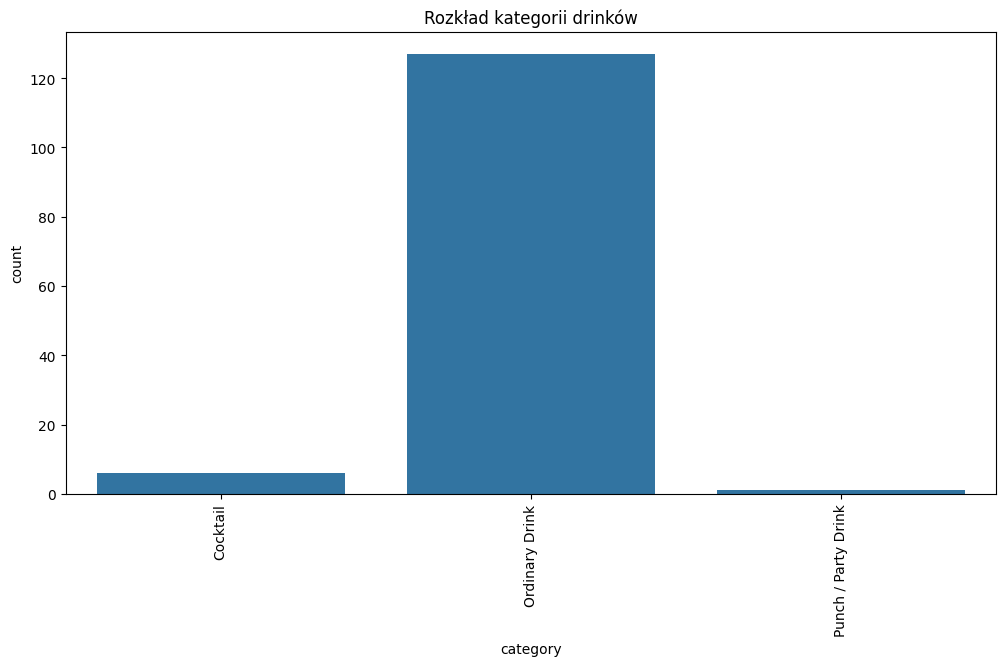

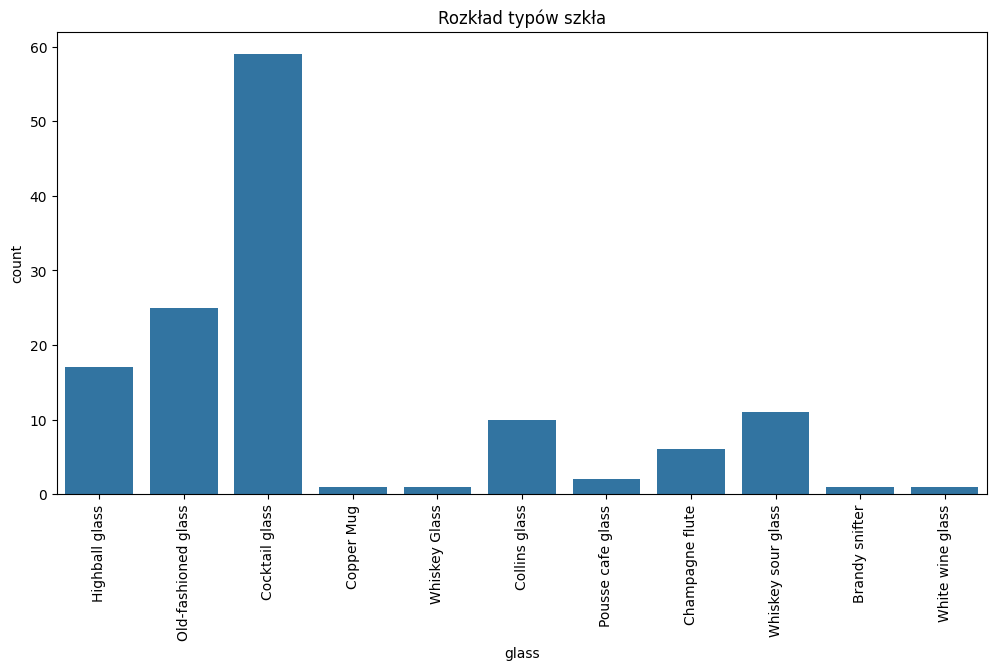

In [119]:

plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df)
plt.title("Rozkład kategorii drinków")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='glass', data=df)
plt.title("Rozkład typów szkła")
plt.xticks(rotation=90)
plt.show()

Rozkład liczby składników

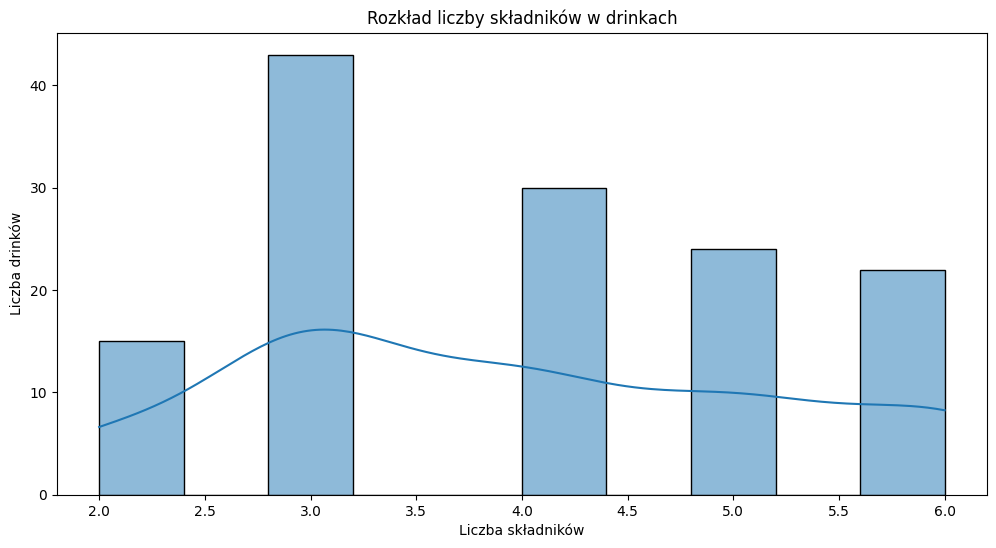

In [120]:
plt.figure(figsize=(12, 6))
sns.histplot(df['num_ingredients'], bins=10, kde=True)
plt.title("Rozkład liczby składników w drinkach")
plt.xlabel("Liczba składników")
plt.ylabel("Liczba drinków")
plt.show()

Najczęściej występujące składniki

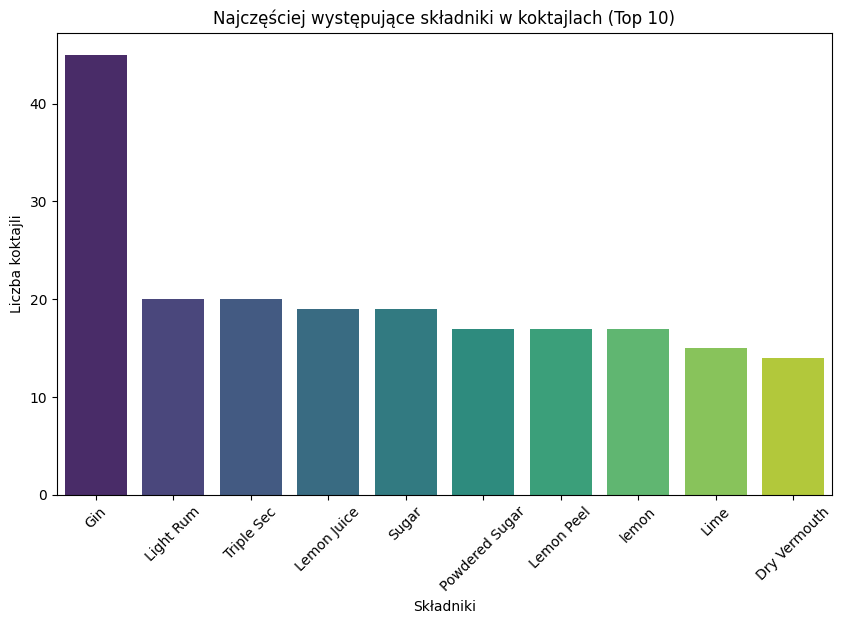

In [121]:

ingredient_counts = ingredients_df.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=ingredient_counts.head(10).index, y=ingredient_counts.head(10).values, palette='viridis', hue = ingredient_counts.head(10).index)
plt.title('Najczęściej występujące składniki w koktajlach (Top 10)')
plt.xlabel('Składniki')
plt.ylabel('Liczba koktajli')
plt.xticks(rotation=45)
plt.show()

korzystając z funkcji przygotowujacej dane możemy wykonać klasteryzacje k-means na podstawie ramki danych składników

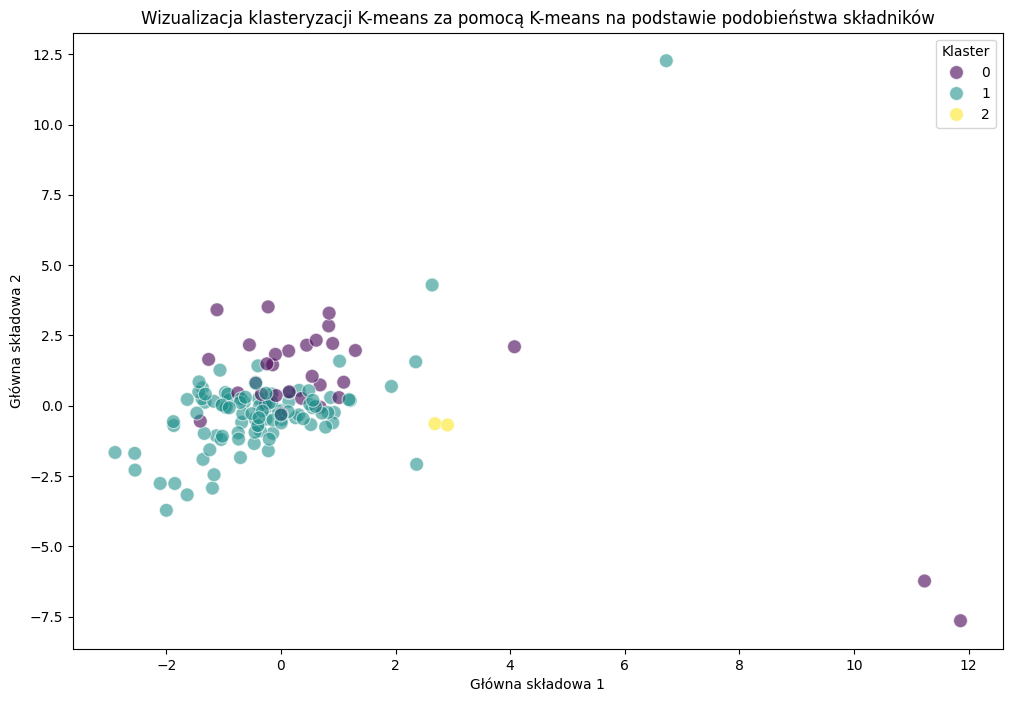

In [122]:
pca_df_ing, n_clusters = preprocess(df, ingredients_df, 3)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df_ing, palette='viridis', s=100, alpha=0.6)
plt.title('Wizualizacja klasteryzacji K-means za pomocą K-means na podstawie podobieństwa składników')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.legend(title='Klaster')


Aby dowiedzień się co charakteryzuje każdy klaster zrobimy analize, w których klastrze jaki składnik dominował


Klaster 0:


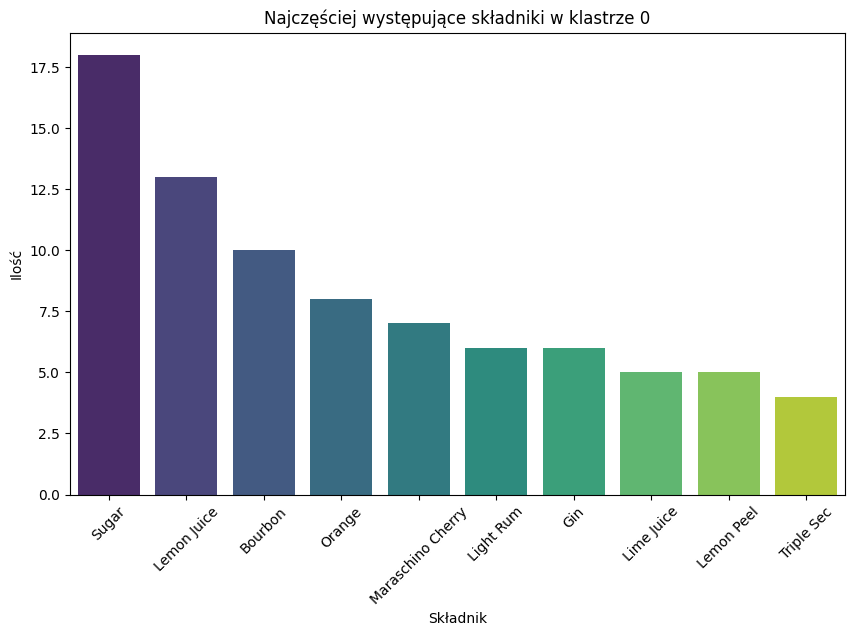


Klaster 1:


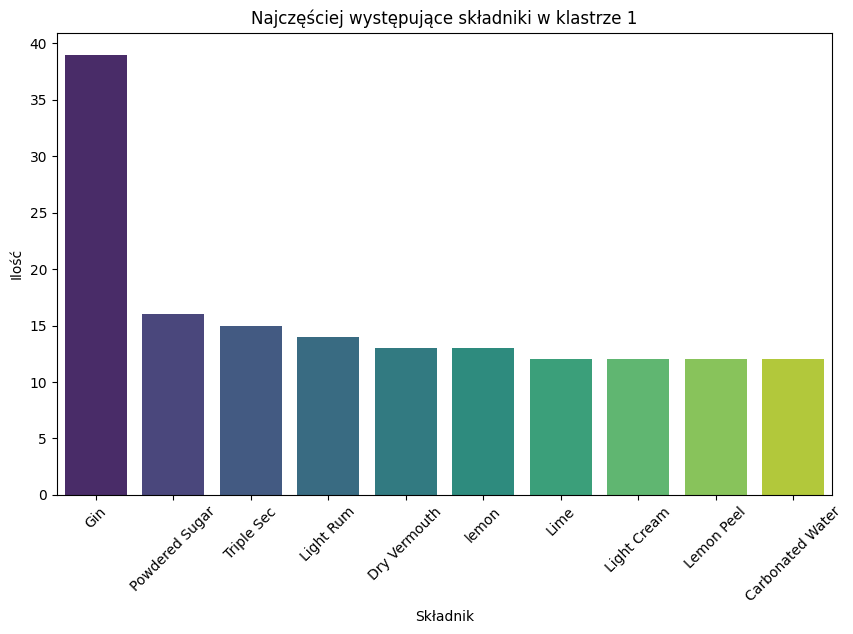


Klaster 2:


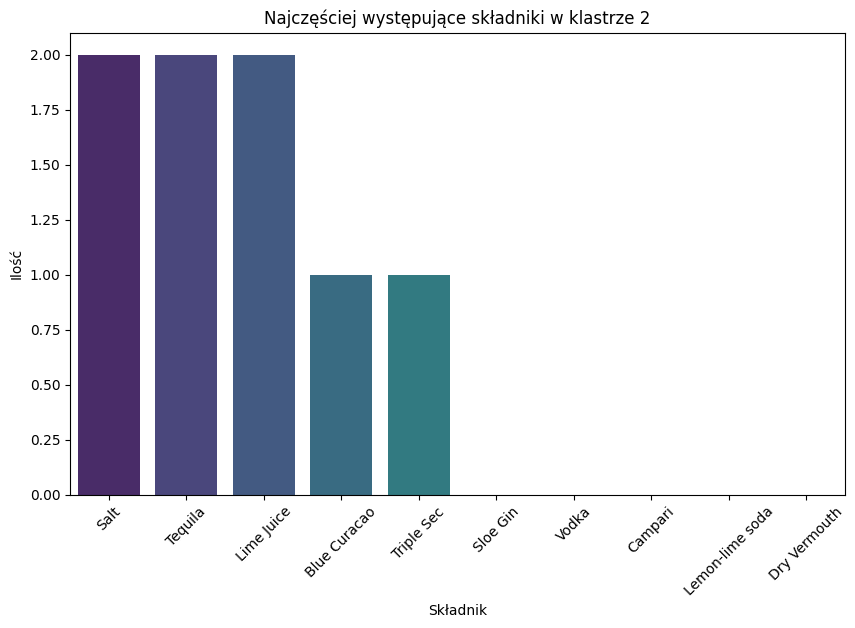

In [123]:
#Analiza składników w klastrach
for cluster in range(n_clusters):
    print(f"\nKlaster {cluster}:")
    #Wyciągnięcie składników z klastrów
    cluster_data = df[df['cluster'] == cluster]
    
    #sumowanie
    ingredients_count = cluster_data[ingredients_df.columns].sum()
    
    # Najpopularniejsze składniki w klastrze
    top_ingredients = ingredients_count.sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_ingredients.index, y=top_ingredients.values, palette='viridis', hue=top_ingredients.index)
    plt.title(f"Najczęściej występujące składniki w klastrze {cluster}")
    plt.xlabel("Składnik")
    plt.ylabel("Ilość")
    plt.xticks(rotation=45)
    plt.show()

In [124]:
cluster_summary = df.groupby('cluster').agg(
    count=('id', 'count'),
    avg_num_ingredients=('num_ingredients', 'mean')
).reset_index()
print(cluster_summary)

   cluster  count  avg_num_ingredients
0        0     31             4.838710
1        1    101             3.693069
2        2      2             4.000000


Możemy dojść do wniosku, że w 0 klastrze najdują się koktajle które bazują w największym stopniu na składnikach "sugar","Lemon juice" i "Burbon",
w klastrze 1 głównie bazują na składiku "Gin". Widać, że w klastrze 1 jest najmniejsza średnia liczba składników i jest on największy, a klaster 0 ma największą średnią ilość składników i jest drugi największy,klaster 2 jest bardzo mały.


Zrobimy teraz klasteryzacje na wszytskich kolumnach binarnych nie tylko na składnikach, dlatego usunę kolumny "category" i "glass"

In [125]:
df = df.drop(["category", 'glass'], axis=1)

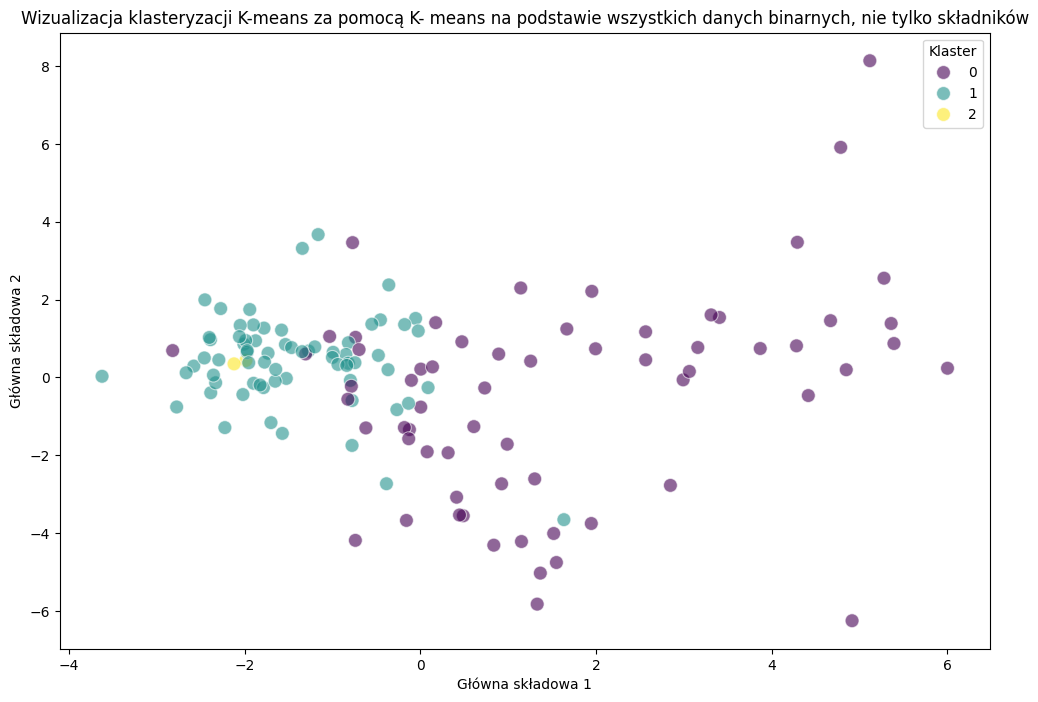

In [126]:
pca_df_ing, n_clusters = preprocess(df, df, 3)
# Wizualizacja klastrów na wykresie punktowym
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df_ing, palette='viridis', s=100, alpha=0.6)
plt.title('Wizualizacja klasteryzacji K-means za pomocą K- means na podstawie wszystkich danych binarnych, nie tylko składników')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.legend(title='Klaster')


Klasteryzacja Gaussian Mixture Model po składnikach

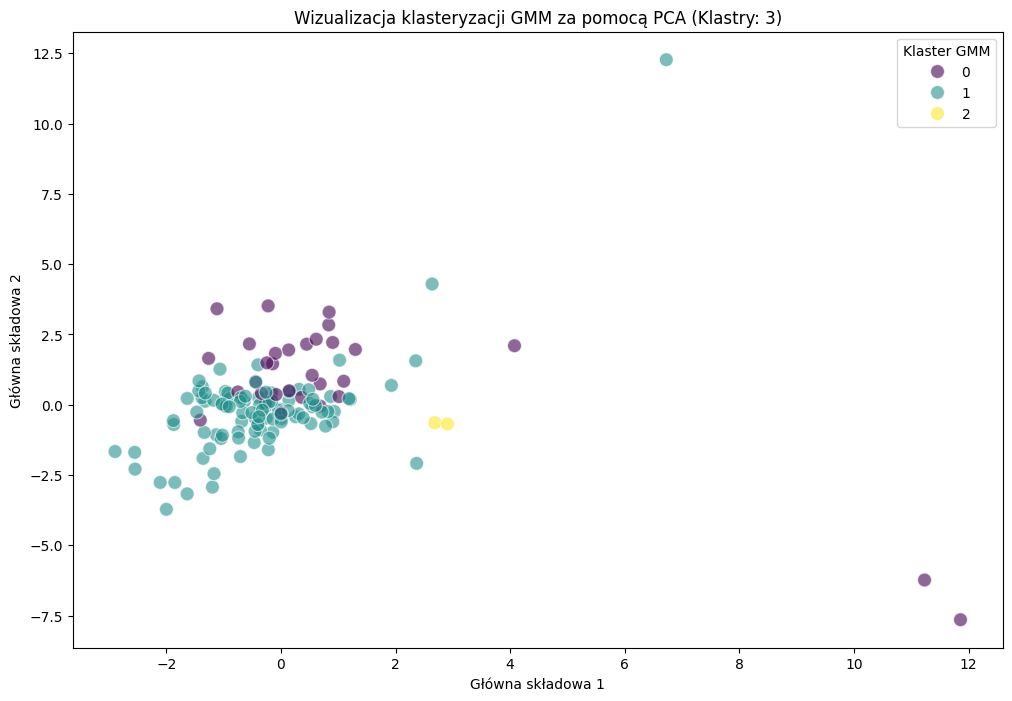

In [127]:
from model import gmm_clustering
n_clusters = 3
pca_df_gmm, _ = gmm_clustering(df, ingredients_df, n_clusters)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="cluster_gmm",
    data=pca_df_gmm,
    palette="viridis",
    s=100,
    alpha=0.6,
)
plt.title(f"Wizualizacja klasteryzacji GMM za pomocą PCA (Klastry: {n_clusters})")
plt.xlabel("Główna składowa 1")
plt.ylabel("Główna składowa 2")
plt.legend(title="Klaster GMM")
plt.show()

Wynik jest bardzo podobny jak w klasteryzacji K-means

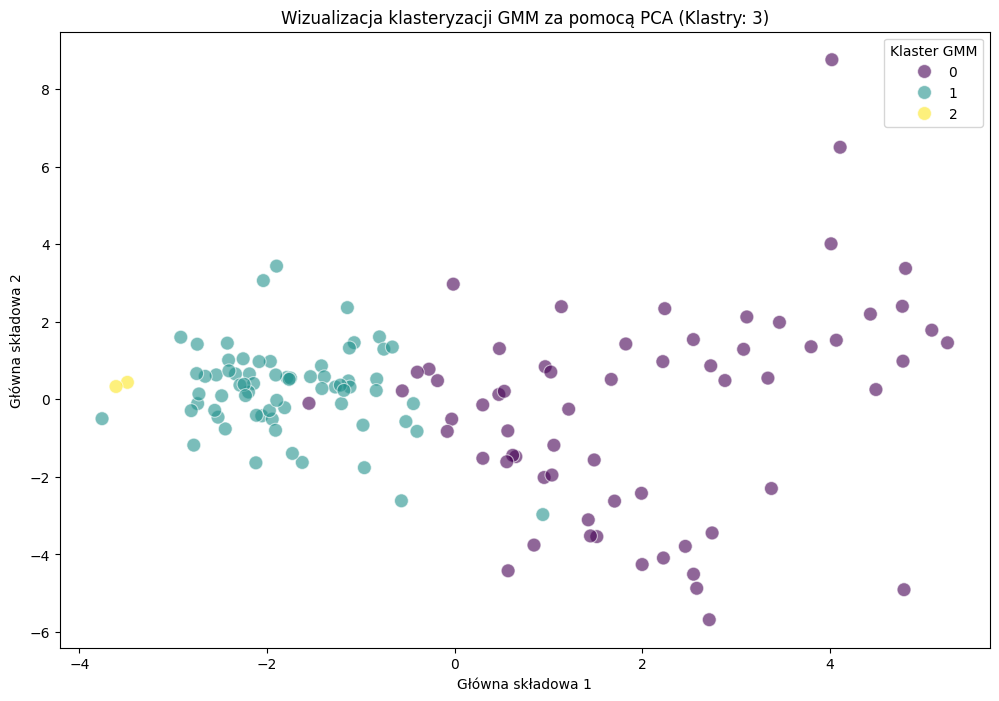

In [128]:
n_clusters = 3
pca_df_gmm, _ = gmm_clustering(df, df, n_clusters)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="cluster_gmm",
    data=pca_df_gmm,
    palette="viridis",
    s=100,
    alpha=0.6,
)
plt.title(f"Wizualizacja klasteryzacji GMM za pomocą PCA (Klastry: {n_clusters})")
plt.xlabel("Główna składowa 1")
plt.ylabel("Główna składowa 2")
plt.legend(title="Klaster GMM")
plt.show()

Dla wszystkich kolumn binarnych wynik jest również bardzo podobny
